## Portfolio Optimization Using Python
> Original content by [areed1192](https://github.com/areed1192)
> Available at [portfolio-optimization](https://github.com/areed1192/portfolio-optimization)


### Modules imported below and what they do

1. `pathlib`: Module for working with file paths in a platform-independent manner. It simplifies tasks related to file and directory manipulation.

2. `numpy`: NumPy is a powerful library for numerical operations in Python. It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays.

3. `pandas`: Pandas is a data manipulation library that provides data structures like DataFrames and Series. It simplifies data analysis and manipulation tasks, especially for working with tabular data.

4. `matplotlib.pyplot`: Matplotlib is a plotting library in Python, and `pyplot` is a module within it. It provides a MATLAB-like interface for creating a variety of plots and visualizations.

5. `scipy.optimize`: SciPy is an open-source library for mathematics, science, and engineering. The `optimize` module within SciPy provides functions for optimization problems, including various optimization algorithms.

6. `fake_useragent.UserAgent`: The `UserAgent` class from the `fake_useragent` module is used to generate random User-Agent strings. This is commonly used in web scraping to mimic different web browsers and devices, reducing the chances of being blocked by websites.

7. `pprint`: Stands for "pretty-print." It's a module for printing data structures in a more human-readable and aesthetically pleasing way. It's often used for debugging and displaying complex structures.

8. `StandardScaler` from `sklearn.preprocessing`: Scikit-learn is a machine learning library, and `StandardScaler` is a class within scikit-learn used for scaling features. It standardizes features by removing the mean and scaling to unit variance.

9. `pyopt.client.PriceHistory`: Importing a specific module (`PriceHistory`) from the `pyopt.client` package. This is a custom module related to financial data, for handling price history data. It is located in `pyopt/client.py`


In [72]:
# Import necessary modules
import pathlib           # Module for working with file paths
import numpy as np       # NumPy, a library for numerical operations in Python
import pandas as pd      # Pandas, a powerful data manipulation library
import matplotlib.pyplot as plt  # Matplotlib for creating plots
import scipy.optimize as sci_plt  # SciPy's optimization module
import pprint # Pretty-print module for enhanced printing of data structures

from fake_useragent import UserAgent # Module to mimic a web browser
from sklearn.preprocessing import StandardScaler  # Scikit-learn's StandardScaler for feature scaling
from pyopt.client import PriceHistory  # Importing a specific module 'PriceHistory' from 'pyopt.client'

# Set display options for Pandas
pd.set_option('display.max_colwidth', None)  # Display full content of DataFrame columns without truncation
pd.set_option('expand_frame_repr', False)    # Prevent DataFrame from wrapping across multiple lines when displayed

pp = pprint.PrettyPrinter(indent=4)


In [73]:
# Define the symbols for the stock portfolio

# symbols = ['AAPL', 'MSFT', 'SQ']

symbols = ['ADM', 'AAPL', 'AMZN', 'AURA', 'BP', 'BABA', 'C', 'DPZ', 'DEO',
             'FTNT', 'JNJ', 'JPM', 'K', 'MELI', 'NKE', 'PG', 'PYPL', 'SCHW',
             'CRM', 'VOD', 'VZ', 'V', 'WBD', 'ZTS']
print(f"Portfolio has {len(symbols)} assets.")

# Get the number of stocks in the portfolio
number_of_symbols = len(symbols)

# Check if there is no existing data file, grab data from NASDAQ
if not pathlib.Path("data/stock_data.csv").exists():
    # Initialize the PriceHistory Client with a UserAgent for Chrome
    # This simulates the use of a browser to access the data
    price_history_client = PriceHistory(symbols=symbols, user_agent=UserAgent().chrome)
    
    # Grab the data and save it to a CSV file
    price_history_client.price_data_frame.to_csv("data/stock_data.csv", index=False)
    
    # Display the obtained data
    display(price_history_client.price_data_frame)
    
    # Store the data frame for further use
    price_data_frame: pd.DataFrame = price_history_client.price_data_frame
    
else:
    # Load the existing CSV file if data already exists
    price_data_frame: pd.DataFrame = pd.read_csv("data/stock_data.csv")

# Display the first few rows of the loaded or obtained data
display(price_data_frame.head())


Portfolio has 24 assets.


,date,close,volume,open,high,low,symbol
0,2024-01-09,195.94,1983273,195.55,199.825,194.045,ZTS
1,2024-01-08,196.15,1610635,194.53,196.280,192.670,ZTS
2,2024-01-05,194.85,1088179,193.07,195.940,193.070,ZTS
3,2024-01-04,194.04,1852027,192.85,194.930,192.010,ZTS
4,2024-01-03,192.93,1492974,195.92,195.950,192.795,ZTS


In [74]:
# Grab columns needed
price_data_frame = price_data_frame[['date', 'symbol', 'close']]

# Pivot Dataframe
price_data_frame = price_data_frame.pivot(
    index='date',
    columns='symbol',
    values='close')

display(price_data_frame)

symbol,AAPL,ADM,AMZN,AURA,BABA,BP,C,CRM,DEO,DPZ,...,MELI,NKE,PG,PYPL,SCHW,V,VOD,VZ,WBD,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2023-07-10,188.61,78.54,127.13,11.84,90.56,35.21,45.67,212.81,169.43,347.41,...,1087.15,105.78,148.86,69.28,57.83,238.16,9.12,35.14,12.95,170.22
2023-07-11,188.08,80.47,128.78,11.98,91.79,35.91,46.53,221.17,171.61,349.79,...,1121.58,107.39,148.08,70.62,57.58,240.55,9.31,34.99,13.30,170.14
2023-07-12,189.77,78.73,130.80,12.24,94.00,36.31,47.38,227.28,173.30,388.59,...,1141.13,107.76,148.85,70.59,58.41,242.21,9.49,34.86,13.16,171.86
2023-07-13,190.54,79.17,134.30,12.38,96.61,36.53,47.68,230.37,175.79,386.87,...,1146.72,107.84,148.95,72.39,59.93,243.31,9.59,34.64,13.10,171.00
2023-07-14,190.69,78.20,134.68,12.21,94.56,35.52,45.75,229.33,177.53,384.66,...,1135.72,107.95,150.05,72.10,58.52,243.16,9.57,34.01,12.40,172.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-03,184.25,73.13,148.47,9.00,76.59,36.00,53.64,251.84,143.06,400.46,...,1500.00,104.04,147.84,58.63,67.05,257.98,8.86,39.16,11.30,192.93
2024-01-04,181.91,71.75,144.57,8.97,74.66,35.76,53.77,251.24,142.45,401.27,...,1519.38,102.30,148.65,58.45,66.89,259.61,8.96,39.37,11.35,194.04
2024-01-05,181.18,70.81,145.24,8.85,73.01,36.03,54.33,251.12,141.51,400.03,...,1538.83,102.08,147.42,60.12,67.23,259.69,8.98,40.20,11.20,194.85


In [75]:
# Calculate the log Returns
log_return = np.log(1 + price_data_frame.pct_change())

# Generate some Random Weights
random_weights = np.array(np.random.random(number_of_symbols))
display(random_weights)

# Generate the Rebalance Weights, and they must equal 1
rebalance_weights = random_weights / np.sum(random_weights)
display(rebalance_weights)

# Calculate annualized expected returns
exp_returns = np.sum((log_return.mean() * rebalance_weights) * 252)
display(exp_returns)

# Calculate annualized expected volatility
exp_vol = np.sqrt(
    np.dot(
        rebalance_weights.T,
        np.dot(
            log_return.cov() * 252, rebalance_weights
        )
    )
)
display(exp_vol)

# Calculate Sharpe Ratio
sharpe_ratio = exp_returns / exp_vol
display(sharpe_ratio)

# Put the weights into a data frame to see them better.
weights_df = pd.DataFrame(data={
'random_weights': random_weights,
'rebalance_weights': rebalance_weights
})

print('PORTFOLIO WEIGHTS:')
display(weights_df)

# Do the same with the other metrics.
metrics_df = pd.DataFrame(data={
    'Expected Portfolio Returns': exp_returns,
    'Expected Portfolio Volatility': exp_vol,
    'Portfolio Sharpe Ratio': sharpe_ratio
}, index=[0])

print('PORTFOLIO METRICS:')
display(metrics_df)


array([0.4372719 , 0.21862823, 0.38668037, 0.80914447, 0.21500977,
       0.4931088 , 0.40305011, 0.01025856, 0.09601485, 0.7684653 ,
       0.23621611, 0.34827673, 0.88538636, 0.66008776, 0.67976197,
       0.70785672, 0.65716228, 0.27777081, 0.36825515, 0.84572487,
       0.46344843, 0.23380315, 0.15825495, 0.05992191])

array([0.04196645, 0.02098248, 0.03711101, 0.0776563 , 0.02063521,
       0.0473253 , 0.03868207, 0.00098455, 0.00921487, 0.07375219,
       0.02267045, 0.03342528, 0.08497349, 0.06335083, 0.06523903,
       0.06793538, 0.06307006, 0.02665859, 0.03534268, 0.08116705,
       0.0444787 , 0.02243887, 0.01518826, 0.00575091])

0.05296270405169896

0.1419460929202855

0.37311843504873293

PORTFOLIO WEIGHTS:


,random_weights,rebalance_weights
0,0.437272,0.041966
1,0.218628,0.020982
2,0.386680,0.037111
3,0.809144,0.077656
4,0.215010,0.020635
5,0.493109,0.047325
6,0.403050,0.038682
7,0.010259,0.000985
8,0.096015,0.009215
9,0.768465,0.073752


PORTFOLIO METRICS:


,Expected Portfolio Returns,Expected Portfolio Volatility,Portfolio Sharpe Ratio
0,0.052963,0.141946,0.373118


## Monte Carlo Optimization


In [76]:
# Define the number of times that the simulation will run
num_of_portfolios = 30000

# Prepr the Weight Array of Numpy Zeros
all_weights = np.zeros((num_of_portfolios, number_of_symbols))

# Prep the Retuns Array of Numpy Zeros
ret_arr = np.zeros(num_of_portfolios)

# Prep the Volatilily Array of Numpy Zeros
vol_arr = np.zeros(num_of_portfolios)

# Prep Sharpe Array
sharpe_arr = np.zeros(num_of_portfolios)

# Start the simulation
for i in range(num_of_portfolios):
    
    # Calculate the weights
    weights = np.array(np.random.random(number_of_symbols))
    weights = weights / np.sum(weights)
    
    # Add weights to 'weights_array'
    all_weights[i, :] = weights
    
    # Calculate the Annualized Expected Log Returns
    ret_arr[i] = np.sum((log_return.mean() * weights) * 252)

    # Calculate Annualized volatilties and add to vol_arr
    vol_arr[i] =np.sqrt(
        np.dot(weights.T, np.dot(log_return.cov() * 252, weights))
    )
    
    # Calculate Sharpe Ratio
    sharpe_arr[i] = ret_arr[i] / vol_arr[i]
    
# Combine all arrays
simulations_data = [ret_arr, vol_arr, sharpe_arr, all_weights]

# Create Dataframe
simulations_df = pd.DataFrame(data=simulations_data).T

# Give Column names
simulations_df.columns = [
    'Returns',
    'Volatility',
    'Sharpe Ratio',
    'Portfolio Weights',
]

# Make sure the data types are correct
simulations_df = simulations_df.infer_objects()

print("SIMULATION RESULTS:")
display(simulations_df)

SIMULATION RESULTS:


,Returns,Volatility,Sharpe Ratio,Portfolio Weights
0,-0.016489,0.163574,-0.100803,"[0.041334073816392335, 0.040052435561005705, 0.05133685911283257, 0.07030716890007144, 0.04904460578661821, 0.026768107189875115, 0.05453301393361511, 0.058403200288948916, 0.02939490030097959, 0.04198138247562727, 0.06473594830422352, 0.03286614244738163, 0.00664301314629953, 0.005305074955274162, 0.05132542782445747, 0.062454301288741784, 0.02335008963134518, 0.05314065630921333, 0.025379883411489595, 0.031657468019542286, 0.04687910852656715, 0.018426009179465207, 0.06974830806343911, 0.044932821526593905]"
1,0.035193,0.141215,0.249218,"[0.00218857983483117, 0.017588419658387304, 0.03388554921580839, 0.011406648000525885, 0.0932256623107867, 0.05666948164020138, 0.010517241975902814, 0.09452430260276674, 0.038428482840463726, 0.021405086260628748, 0.08835207728444136, 0.03141310409046046, 0.04410458880395628, 0.008236045041353618, 0.06765649635156593, 0.005593021131414779, 0.09070353550903577, 0.028553187345534883, 0.0481929639581796, 0.0656622707788555, 0.019454381542829073, 0.04235353704843236, 0.03899041574909531, 0.040894921024542126]"
2,0.026271,0.130843,0.200783,"[0.06329167128897885, 0.0021870530663998817, 0.03205872878946912, 0.03953736197354589, 0.07002984823959996, 0.09510622020172134, 0.012174186319384446, 0.01853974828240607, 0.008444984566360902, 0.06800480542191152, 0.06192939093711718, 0.06697914335229116, 0.03514037925412077, 0.05177687251500131, 0.05584752726773407, 0.0417185743296573, 0.011012505277033135, 0.02240628140898745, 0.021140801122225057, 0.09574981050562206, 0.0421897379609969, 0.0032585267967357285, 0.009608000071599645, 0.07186784105110029]"
3,0.025414,0.142351,0.178532,"[0.04276197782255235, 0.04182314119981094, 0.06565777450165035, 0.06102405436914706, 0.05623147176847635, 0.02243994592500984, 0.017957587709425522, 0.06619863299655793, 0.027725225406763643, 0.06100819567199268, 0.03774262660558174, 0.05472215762936325, 0.06388344167152542, 0.06340105772921012, 0.04194074860589536, 0.0029057521423886622, 0.057167254577674464, 0.0015419688922214687, 0.020028417117645827, 0.06046764105622093, 0.0006422340022044195, 0.058786896526305275, 0.0654750040804927, 0.008466791991883828]"
4,0.058441,0.130456,0.447978,"[0.06902222502776112, 0.0074938257356648615, 0.027862338654247615, 0.024240019110215807, 0.06124687150630212, 0.06045605390783407, 0.06748924242719756, 0.04975321885607652, 0.0134920311367277, 0.050938473031858916, 0.008399377527885034, 0.0624124103318811, 0.06190464332595108, 0.029170786050976033, 0.01654291295097627, 0.058226957304705125, 0.03862408048307198, 0.052670821938656014, 0.04235257123624627, 0.05104632442403043, 0.017501894449136822, 0.06652472820868152, 0.02911679386105033, 0.0335113985128657]"
...,...,...,...,...
29995,-0.026141,0.151412,-0.172650,"[0.010939019146682043, 0.07332011451455077, 0.04751012084369687, 0.05918091344382983, 0.03776394919900092, 0.04397664062819882, 0.016241722925740495, 0.04958335831921105, 0.03993139853163974, 0.062283750101651145, 0.06689278820318235, 0.005374835613353697, 0.02780671317394159, 0.053856132994500414, 0.051363316268507715, 0.07447778677348593, 0.008088417177834683, 0.045032555166634576, 0.005659441266951107, 0.05789899848797813, 0.02461331714826066, 0.056854555321363555, 0.06300572318048306, 0.018344431569320852]"
29996,0.074531,0.128791,0.578697,"[0.029975594633918384, 0.04824574815698516, 0.05081999578095054, 0.008549063980693244, 0.03663199846183152, 0.039283486558051625, 0.04655540520802509, 0.0606175163484752, 0.04359964945565564, 0.03824548691442695, 0.0002504271435195578, 0.06635976050753582, 0.06701114239657364, 0.06308976864387249, 0.023032797814197488, 0.040993542840803705, 0.014856077987812428, 0.06674902625589374, 0.07016496463851318, 0.02657605873595223, 0.05144883022204005, 0.037797873869582284, 0.005764693467767488, 0.06338108997692248]"
29997,0.002254,0.148120,0.015218,"[0.02643717952838831, 0.014742404646925271, 0.078605787719869, 0.0789

## Metrics

In [77]:

# Grab Max Sharp Ratio
max_sharp_ratio = simulations_df.loc[simulations_df['Sharpe Ratio'].idxmax()]
max_sharp_ratio_df = pd.DataFrame(simulations_df.loc[simulations_df['Sharpe Ratio'].idxmax()])

# Return Min Volatility
min_volatility = simulations_df.loc[simulations_df['Volatility'].idxmin()]
min_volatility_df = pd.DataFrame(simulations_df.loc[simulations_df['Volatility'].idxmin()])

max_sharpe_dict = dict(zip(symbols, max_sharp_ratio[3]))
min_vol_dict = dict(zip(symbols, min_volatility[3]))

# Convert values to percentages with 2 decimal places
max_sharpe_pct = {key: f"{value * 100:.2f}%" for key, value in max_sharpe_dict.items()}
min_vol_pct = {key: f"{value * 100:.2f}%" for key, value in min_vol_dict.items()}

print("Max Sharpe Ratio:")
display(max_sharp_ratio_df)
display(max_sharp_ratio[3])
print("Min Volatility:")
display(min_volatility_df)
display(min_volatility[3])

pp.pprint(max_sharpe_pct)
pp.pprint(min_vol_pct)


Max Sharpe Ratio:


/tmp/ipykernel_27584/3540851752.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_sharpe_dict = dict(zip(symbols, max_sharp_ratio[3]))
/tmp/ipykernel_27584/3540851752.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_vol_dict = dict(zip(symbols, min_volatility[3]))


,1761
Returns,0.172571
Volatility,0.133584
Sharpe Ratio,1.291859
Portfolio Weights,"[0.033263477519586575, 0.0054046847318346795, 0.06530827460455665, 0.018525527552197177, 0.034034701830094716, 0.044114831830459125, 0.10041296636953446, 0.04840013647789388, 0.004674087751732699, 0.03203239693780383, 0.006244091336277997, 0.055578110798892494, 0.007052763435797597, 0.004341114615136534, 0.10009546081185061, 0.09830464784589112, 0.04087254702985431, 0.014482640956973348, 0.022762973354890175, 0.08776894075758056, 0.04439821162098941, 0.04167648374392481, 0.0014240085510007516, 0.0888269195352466]"


/tmp/ipykernel_27584/3540851752.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(max_sharp_ratio[3])


array([0.03326348, 0.00540468, 0.06530827, 0.01852553, 0.0340347 ,
       0.04411483, 0.10041297, 0.04840014, 0.00467409, 0.0320324 ,
       0.00624409, 0.05557811, 0.00705276, 0.00434111, 0.10009546,
       0.09830465, 0.04087255, 0.01448264, 0.02276297, 0.08776894,
       0.04439821, 0.04167648, 0.00142401, 0.08882692])

Min Volatility:


,11838
Returns,0.044719
Volatility,0.108058
Sharpe Ratio,0.413836
Portfolio Weights,"[0.06065763776126331, 0.04934942217863806, 0.06443453482562249, 0.008341244689357437, 0.004835821918881779, 0.05787044635117852, 0.0031874125057266, 0.018958712672727744, 0.07838264965322769, 0.028974338141893437, 0.03357107657382646, 0.06454638971441179, 0.07942009339887844, 0.059635406968021935, 0.02598266067888317, 0.0184033217847174, 0.06826355378820567, 0.00045402266734556623, 0.011947020890761264, 0.0649662845318556, 0.06491238445330591, 0.051793405749951484, 0.013922143277527804, 0.06719001482379038]"


/tmp/ipykernel_27584/3540851752.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(min_volatility[3])


array([0.06065764, 0.04934942, 0.06443453, 0.00834124, 0.00483582,
       0.05787045, 0.00318741, 0.01895871, 0.07838265, 0.02897434,
       0.03357108, 0.06454639, 0.07942009, 0.05963541, 0.02598266,
       0.01840332, 0.06826355, 0.00045402, 0.01194702, 0.06496628,
       0.06491238, 0.05179341, 0.01392214, 0.06719001])

{   'AAPL': '0.54%',
    'ADM': '3.33%',
    'AMZN': '6.53%',
    'AURA': '1.85%',
    'BABA': '4.41%',
    'BP': '3.40%',
    'C': '10.04%',
    'CRM': '2.28%',
    'DEO': '0.47%',
    'DPZ': '4.84%',
    'FTNT': '3.20%',
    'JNJ': '0.62%',
    'JPM': '5.56%',
    'K': '0.71%',
    'MELI': '0.43%',
    'NKE': '10.01%',
    'PG': '9.83%',
    'PYPL': '4.09%',
    'SCHW': '1.45%',
    'V': '4.17%',
    'VOD': '8.78%',
    'VZ': '4.44%',
    'WBD': '0.14%',
    'ZTS': '8.88%'}
{   'AAPL': '4.93%',
    'ADM': '6.07%',
    'AMZN': '6.44%',
    'AURA': '0.83%',
    'BABA': '5.79%',
    'BP': '0.48%',
    'C': '0.32%',
    'CRM': '1.19%',
    'DEO': '7.84%',
    'DPZ': '1.90%',
    'FTNT': '2.90%',
    'JNJ': '3.36%',
    'JPM': '6.45%',
    'K': '7.94%',
    'MELI': '5.96%',
    'NKE': '2.60%',
    'PG': '1.84%',
    'PYPL': '6.83%',
    'SCHW': '0.05%',
    'V': '5.18%',
    'VOD': '6.50%',
    'VZ': '6.49%',
    'WBD': '1.39%',
    'ZTS': '6.72%'}


## Plotting


/tmp/ipykernel_27584/2172736967.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_sharp_ratio[1],
/tmp/ipykernel_27584/2172736967.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_sharp_ratio[0],
/tmp/ipykernel_27584/2172736967.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_volatility[1],
/tmp/ipykernel_27584/2172736967.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a fu

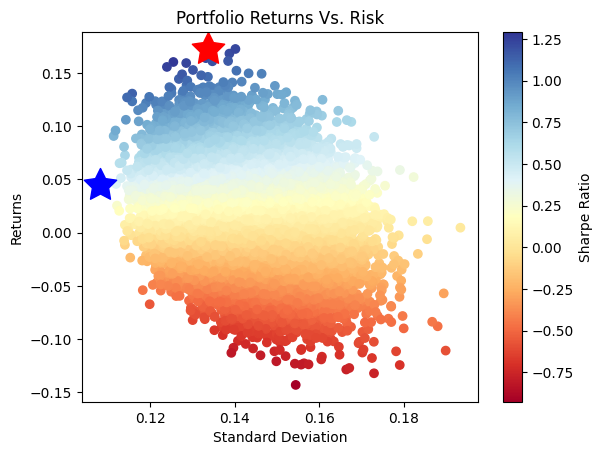

In [78]:
%matplotlib inline

# Plot the data on Scatter Plot
plt.scatter(
    y=simulations_df['Returns'],
    x=simulations_df['Volatility'],
    c=simulations_df['Sharpe Ratio'],
    cmap='RdYlBu'
)

# Give the plot some titles and axis labels
plt.title('Portfolio Returns Vs. Risk')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')

# Plot the max Sharpe Ratio using a red star
plt.scatter(
    max_sharp_ratio[1],
    max_sharp_ratio[0],
    marker=(5, 1, 0),
    color='r',
    s=600
)

# Plot the nim Volatility using a blue star
plt.scatter(
    min_volatility[1],
    min_volatility[0],
    marker=(5, 1, 0),
    color='b',
    s=600
)

# Show the plot
plt.show()

## Scipy Optimization

> Not exactly clear about what is going on....

In [79]:
# Define a function 'get_metrics' that calculates portfolio metrics based on given weights
def get_metrics(weights: list) -> np.array:
    # Convert the input weights to a NumPy array
    weights = np.array(weights)
    
    # Calculate the expected portfolio returns
    ret = np.sum(log_return.mean() * weights) * 252
    
    # Calculate portfolio volatility
    vol = np.sqrt(
        np.dot(weights.T, np.dot(log_return.cov() * 252, weights))
    )
    
    # Calculate Sharpe ratio
    sr = ret / vol
    
    # Return an array containing returns, volatility, and Sharpe ratio
    return np.array([ret, vol, sr])

# Define a function 'grab_negative_sharp' that returns the negative Sharpe ratio
# The optimization will aim to minimize the negative Sharpe ratio, which is equivalent to maximizing the Sharpe ratio
def grab_negative_sharp(weights: list) -> np.array:
    # Calculate and return the negative Sharpe ratio (subtracting 1 to convert to minimization problem)
    return get_metrics(weights)[2] - 1

# Define a function 'grab_volatility' that returns the portfolio volatility
def grab_volatility(weights: list) -> np.array:
    # Calculate and return the portfolio volatility
    return get_metrics(weights)[1]

# Define a function 'check_sum' that checks if the sum of weights is equal to 1
def check_sum(weights: list) -> float:
    # Calculate and return the difference between the sum of weights and 1
    return np.sum(weights) - 1
    

In [80]:
# Define the bounds on the optimization process. Ensure no asset weight is above 100% of the total portfolio
bounds = tuple((0, 1) for _ in range(number_of_symbols))

# Define constraints. Ensure the total weights don't exceed 100%
constraints = ({'type': 'eq', 'fun': check_sum})

# Define initial guesses for asset weights
init_guess = number_of_symbols * [1 / number_of_symbols]

# Perform optimization using the Sequential Least SQuares Programming (SLSQP) method
optimized_sharpe = sci_plt.minimize(
    grab_negative_sharp,  # Objective function to minimize (negative Sharpe ratio)
    init_guess,            # Initial guesses for asset weights
    method='SLSQP',        # Optimization method (Sequential Least SQuares Programming)
    bounds=bounds,         # Asset weight bounds
    constraints=constraints  # Constraints on total weights
)

# Print results
print('Optimized Sharpe')
print(optimized_sharpe)





Optimized Sharpe
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -3.174097770023017
       x: [ 0.000e+00  1.541e-01 ...  1.203e-02  2.366e-15]
     nit: 14
     jac: [ 6.583e-01 -1.018e-03 ...  7.010e-04  3.039e+00]
    nfev: 359
    njev: 14


In [81]:
# Grab final results
optimized_metrics = get_metrics(weights=optimized_sharpe.x)

print('Optimized Weights')
print(optimized_sharpe.x)
print('Optimized Metrics')
print('[ret, vol, sr]')
print(optimized_metrics)

Optimized Weights
[0.00000000e+00 1.54131814e-01 2.11963760e-17 2.98874356e-02
 2.03540678e-01 0.00000000e+00 1.83195695e-15 5.93692298e-15
 2.68236911e-01 6.31039398e-16 1.15959774e-01 0.00000000e+00
 8.55311363e-16 2.16212749e-01 9.84798385e-15 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.62701526e-15 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.20306384e-02 2.36615052e-15]
Optimized Metrics
[ret, vol, sr]
[-0.3521011   0.16195274 -2.17409777]


In [82]:
# Optimize for volatility
# Define the bounds on teh optimization process. Make sure no asset is above 100% of the total portfolio
bounds = tuple((0, 1) for _ in range(number_of_symbols))

# Define constraints. Make sure the total weights dont exceed 100%
constraints = ({'type': 'eq', 'fun': check_sum})

# Define the initial guessess
init_guess = number_of_symbols * [1 / number_of_symbols]

# Perform optimization
optimized_volatility = sci_plt.minimize(
    grab_volatility, # what we need to minimize
    init_guess, # initial weights
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

# Print results
print('Optimized Sharpe')
print(optimized_volatility)



Optimized Sharpe
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.08787240225010295
       x: [ 1.216e-01  0.000e+00 ...  0.000e+00  3.307e-18]
     nit: 9
     jac: [ 8.811e-02  8.864e-02 ...  1.508e-01  1.201e-01]
    nfev: 226
    njev: 9


In [83]:
# Grab final results
optimized_metrics = get_metrics(weights=optimized_volatility.x)

print('Optimized Weights')
print(optimized_volatility.x)
print('Optimized Metrics')
print('[ret, vol, sr]')
print(optimized_metrics)

Optimized Weights
[1.21561691e-01 0.00000000e+00 2.09659896e-02 2.57498016e-18
 8.29414662e-18 1.19748346e-01 0.00000000e+00 0.00000000e+00
 2.23435914e-02 1.34854046e-02 0.00000000e+00 1.64566888e-01
 7.95678026e-02 5.13624038e-02 3.46944695e-18 2.12444677e-03
 1.89024297e-01 0.00000000e+00 2.73761049e-17 1.73399680e-01
 1.36787511e-02 2.81707084e-02 0.00000000e+00 3.30681663e-18]
Optimized Metrics
[ret, vol, sr]
[0.05669357 0.0878724  0.64518063]
